In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa #used for extracting audio features
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [2]:
paths=[]
labels=[]

directory=r"C:\Users\VAISHNAVI\OneDrive\Desktop\ZIDIO PROJECTS\Speech Emotion Recognition\TESS Toronto emotional speech set data"
for dirname,_,filenames in os.walk(directory):
    for filename in filenames:
        if filename.endswith(".wav"):
            paths.append(os.path.join(dirname,filename))
            labels.append(dirname.split(os.sep)[-1])
            print(filename)


OAF_back_angry.wav
OAF_bar_angry.wav
OAF_base_angry.wav
OAF_bath_angry.wav
OAF_bean_angry.wav
OAF_beg_angry.wav
OAF_bite_angry.wav
OAF_boat_angry.wav
OAF_bone_angry.wav
OAF_book_angry.wav
OAF_bought_angry.wav
OAF_burn_angry.wav
OAF_cab_angry.wav
OAF_calm_angry.wav
OAF_came_angry.wav
OAF_cause_angry.wav
OAF_chain_angry.wav
OAF_chair_angry.wav
OAF_chalk_angry.wav
OAF_chat_angry.wav
OAF_check_angry.wav
OAF_cheek_angry.wav
OAF_chief_angry.wav
OAF_choice_angry.wav
OAF_cool_angry.wav
OAF_dab_angry.wav
OAF_date_angry.wav
OAF_dead_angry.wav
OAF_death_angry.wav
OAF_deep_angry.wav
OAF_dime_angry.wav
OAF_dip_angry.wav
OAF_ditch_angry.wav
OAF_dodge_angry.wav
OAF_dog_angry.wav
OAF_doll_angry.wav
OAF_door_angry.wav
OAF_fail_angry.wav
OAF_fall_angry.wav
OAF_far_angry.wav
OAF_fat_angry.wav
OAF_fit_angry.wav
OAF_five_angry.wav
OAF_food_angry.wav
OAF_gap_angry.wav
OAF_gas_angry.wav
OAF_gaze_angry.wav
OAF_germ_angry.wav
OAF_get_angry.wav
OAF_gin_angry.wav
OAF_goal_angry.wav
OAF_good_angry.wav
OAF_goose_a

In [3]:
print(paths)

['C:\\Users\\VAISHNAVI\\OneDrive\\Desktop\\ZIDIO PROJECTS\\Speech Emotion Recognition\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav', 'C:\\Users\\VAISHNAVI\\OneDrive\\Desktop\\ZIDIO PROJECTS\\Speech Emotion Recognition\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav', 'C:\\Users\\VAISHNAVI\\OneDrive\\Desktop\\ZIDIO PROJECTS\\Speech Emotion Recognition\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav', 'C:\\Users\\VAISHNAVI\\OneDrive\\Desktop\\ZIDIO PROJECTS\\Speech Emotion Recognition\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav', 'C:\\Users\\VAISHNAVI\\OneDrive\\Desktop\\ZIDIO PROJECTS\\Speech Emotion Recognition\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav', 'C:\\Users\\VAISHNAVI\\OneDrive\\Desktop\\ZIDIO PROJECTS\\Speech Emotion Recognition\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_beg_angry.wav', 'C:\\Users\\VAISHNAVI\\OneDrive\\Desktop\\ZIDIO PROJE

In [4]:
new_labels=[]
for i in labels:
    i=i.split("_")[-1]
    new_labels.append(i.lower())
print(new_labels)
    

['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 

In [21]:
df=pd.DataFrame()
df["speech"]=paths
df["label"]=new_labels
df.head()

,speech,label
0,C:\Users\VAISHNAVI\OneDrive\Desktop\ZIDIO PROJ...,angry
1,C:\Users\VAISHNAVI\OneDrive\Desktop\ZIDIO PROJ...,angry
2,C:\Users\VAISHNAVI\OneDrive\Desktop\ZIDIO PROJ...,angry
3,C:\Users\VAISHNAVI\OneDrive\Desktop\ZIDIO PROJ...,angry
4,C:\Users\VAISHNAVI\OneDrive\Desktop\ZIDIO PROJ...,angry


In [22]:
df["label"].value_counts()

angry        800
disgust      800
fear         800
happy        800
neutral      800
sad          800
surprise     400
surprised    400
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

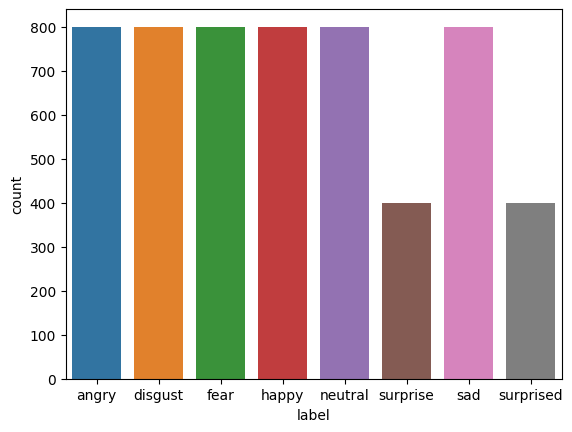

In [24]:
#exploratory data analysis

sns.countplot(x=df["label"])

In [25]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data) #short time fourier transform is used to represent signal on time frequency domain by computing discrete fourier transform
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

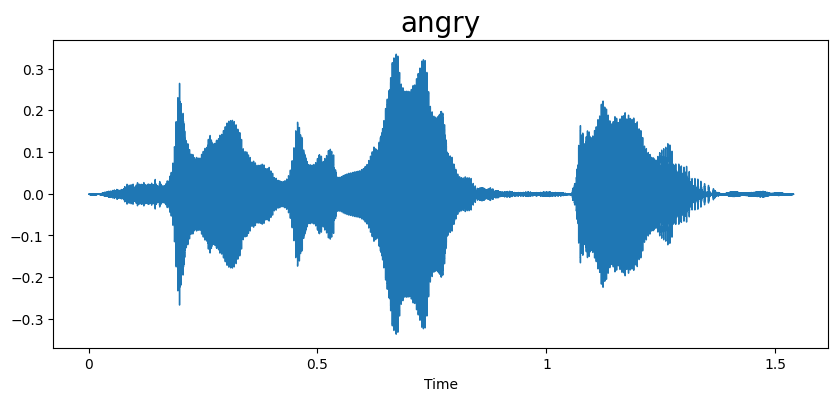

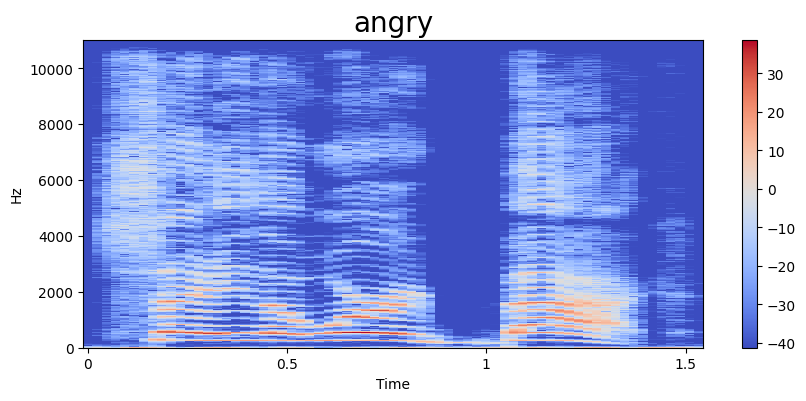

In [26]:
emotion='angry'
path=df["speech"][df["label"]==emotion][0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

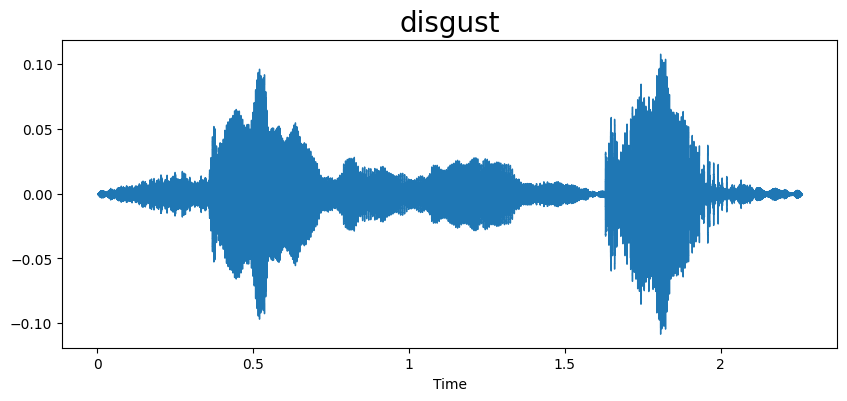

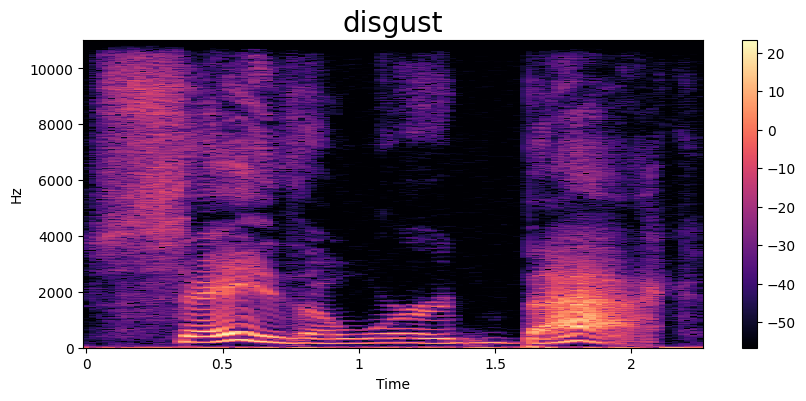

In [27]:
emotion="disgust"
path=df["speech"][df["label"]==emotion][200]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

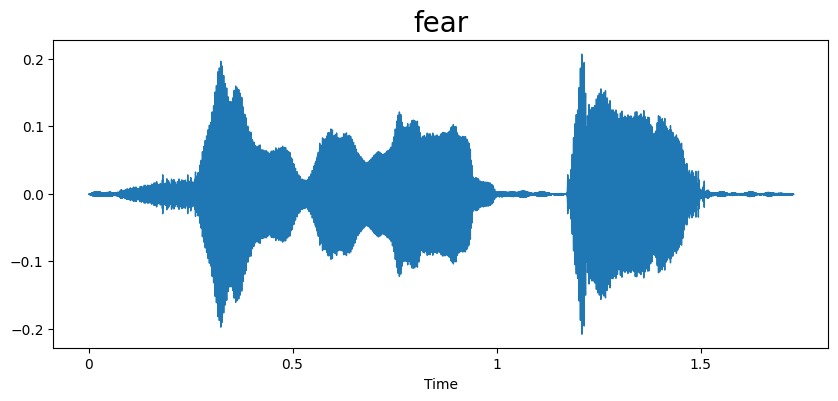

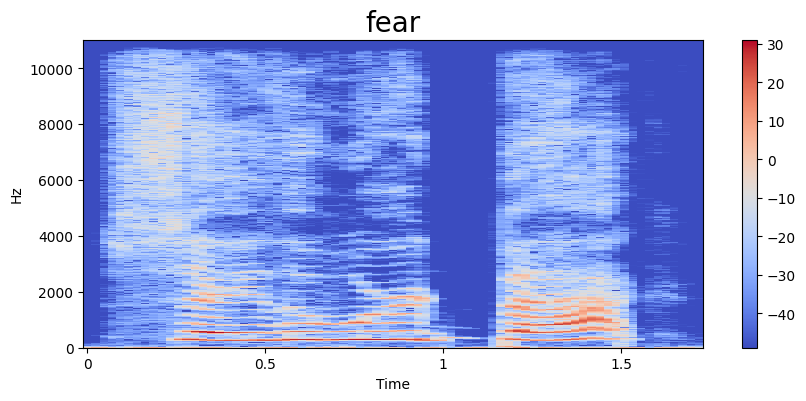

In [28]:
emotion="fear"
path=df["speech"][df["label"]==emotion][400]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

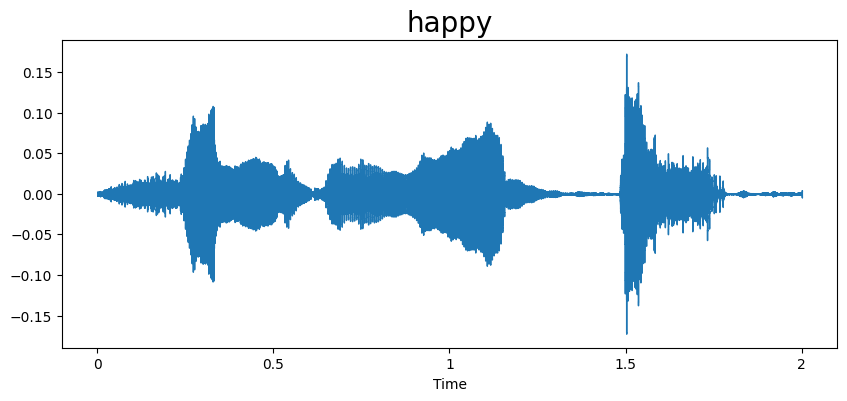

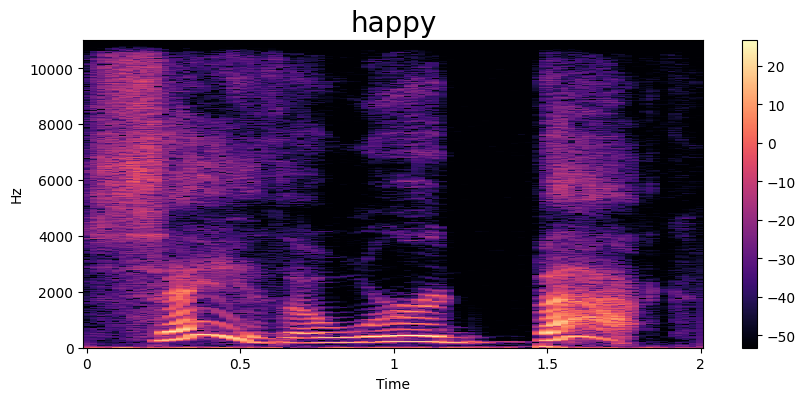

In [29]:
emotion="happy"
path=df["speech"][df["label"]==emotion][600]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

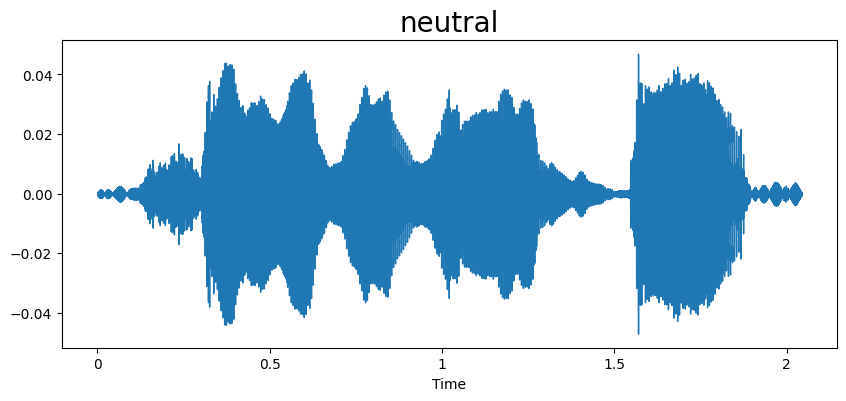

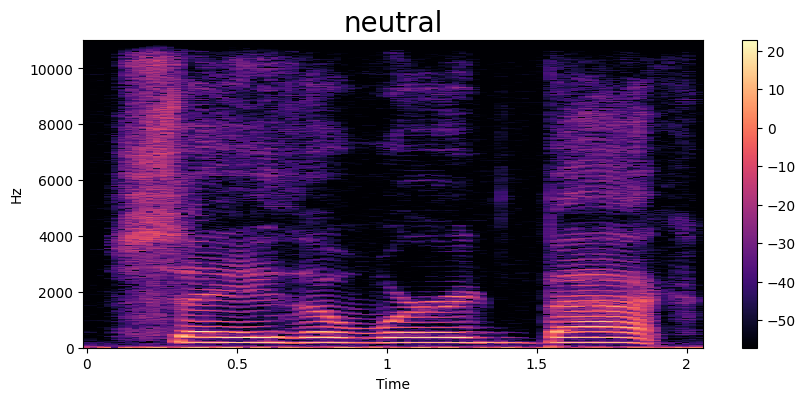

In [30]:
emotion="neutral"
path=df["speech"][df["label"]==emotion][800]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

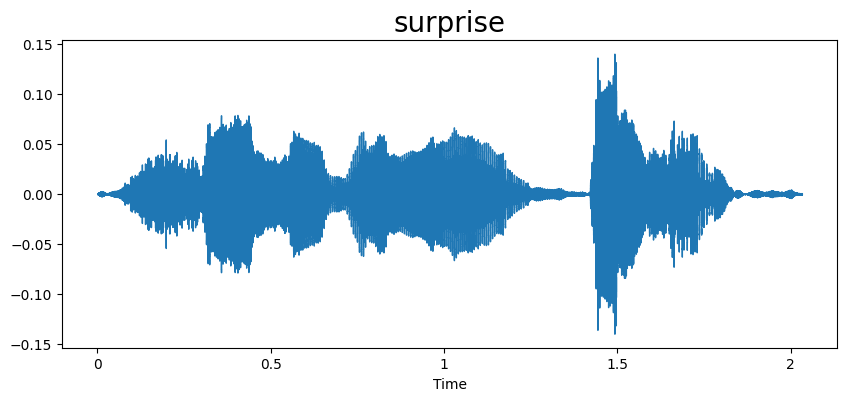

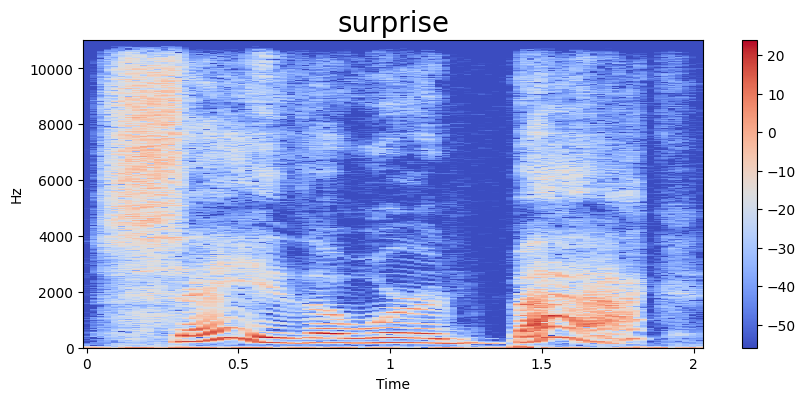

In [31]:
emotion='surprise'
path=df["speech"][df["label"]==emotion][1000]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

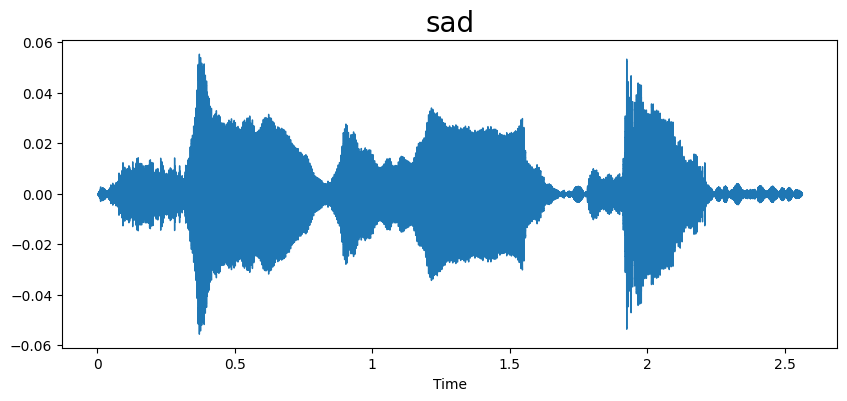

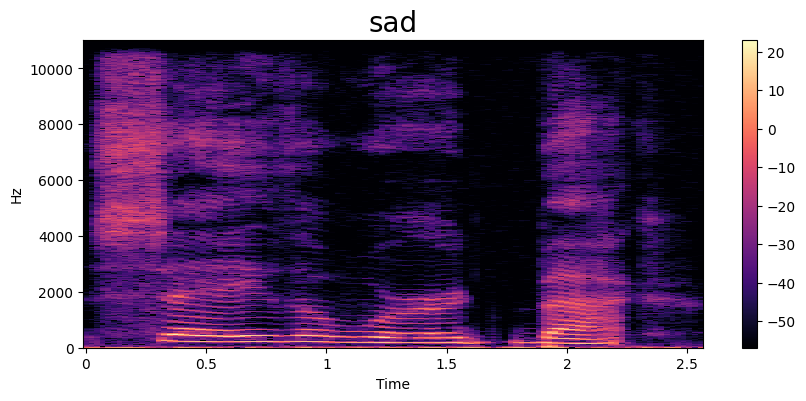

In [32]:
emotion='sad'
path=df["speech"][df["label"]==emotion][1200]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

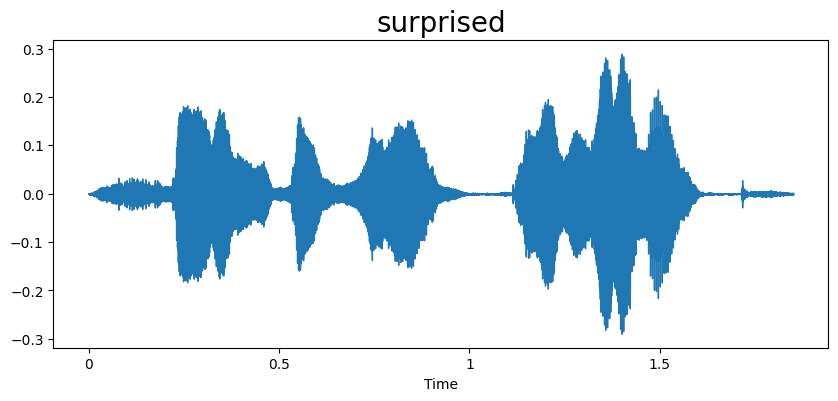

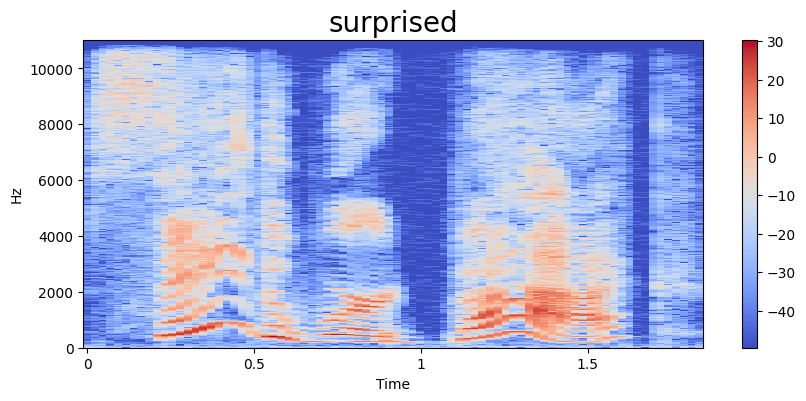

In [33]:
emotion='surprised'
path=df["speech"][df["label"]==emotion][3800]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [34]:
#Feature Extracting
#The function extract_mfcc is designed to extract the Mel-frequency cepstral coefficients (MFCCs) from an audio file. MFCCs are a representation of the short-term power spectrum of sound, and they are commonly used features in various audio processing tasks, such as speech and music analysis.
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [35]:
extract_mfcc(df["speech"][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275578e+00,  1.00753632e+01, -2.03667068e+01, -6.09245014e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255363e+00,  2.02101767e-01,
        7.27550745e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651104e+00, -1.62115932e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722819e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649104e+00],
      dtype=float32)

In [36]:
x_mfcc=df["speech"].apply(lambda x: extract_mfcc(x))

In [37]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600884, -32.74544, ...
2       [-429.79196, 46.124, 1.5550473, -0.21709493, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54757, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.90637, 28.373262, 39.57707, -2....
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [54]:
x=[i for i in x_mfcc]
x=np.array(x)
x.shape

(5600, 40)

In [55]:
#input split 
x=np.expand_dims(x,-1)
x.shape

(5600, 40, 1)

In [56]:
from sklearn.preprocessing import OneHotEncoder  
enc=OneHotEncoder() #enc is an instance of this class
y=enc.fit_transform(df[["label"]]) # it transforms the entire label in one hot encoded format and stores it as sparse matrix

In [57]:
y=y.toarray()

In [58]:
y.shape

(5600, 8)

In [59]:
#Creating LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation="relu"),
    Dropout(0.2),
    Dense(32,activation="relu"),
    Dropout(0.2),
    Dense(8,activation="softmax")
])

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 123)               61500     
                                                                 
 dense_14 (Dense)            (None, 64)                7936      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                 264       
                                                                 
Total params: 71,780
Trainable params: 71,780
Non-trai

In [60]:
#Train the model
history=model.fit(x,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 10s 498ms/step - loss: 1.9626 - accuracy: 0.2839 - val_loss: 1.8845 - val_accuracy: 0.2875
Epoch 2/100
9/9 [==============================] - 3s 329ms/step - loss: 1.6437 - accuracy: 0.4629 - val_loss: 1.5807 - val_accuracy: 0.3946
Epoch 3/100
9/9 [==============================] - 3s 315ms/step - loss: 1.2849 - accuracy: 0.5489 - val_loss: 1.2044 - val_accuracy: 0.4625
Epoch 4/100
9/9 [==============================] - 3s 314ms/step - loss: 1.0307 - accuracy: 0.6089 - val_loss: 0.9677 - val_accuracy: 0.6696
Epoch 5/100
9/9 [==============================] - 3s 308ms/step - loss: 0.8234 - accuracy: 0.6996 - val_loss: 0.7069 - val_accuracy: 0.7098
Epoch 6/100
9/9 [==============================] - 3s 309ms/step - loss: 0.6436 - accuracy: 0.7625 - val_loss: 0.5479 - val_accuracy: 0.7563
Epoch 7/100
9/9 [==============================] - 3s 323ms/step - loss: 0.5472 - accuracy: 0.8121 - val_loss: 0.4302 - val_accuracy: 0.8071
Epoch 8/100


Epoch 59/100
9/9 [==============================] - 3s 319ms/step - loss: 0.0115 - accuracy: 0.9971 - val_loss: 0.0039 - val_accuracy: 0.9982
Epoch 60/100
9/9 [==============================] - 3s 306ms/step - loss: 0.0126 - accuracy: 0.9973 - val_loss: 0.0038 - val_accuracy: 0.9982
Epoch 61/100
9/9 [==============================] - 3s 312ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0043 - val_accuracy: 0.9982
Epoch 62/100
9/9 [==============================] - 3s 303ms/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.0038 - val_accuracy: 0.9991
Epoch 63/100
9/9 [==============================] - 3s 312ms/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.0016 - val_accuracy: 0.9991
Epoch 64/100
9/9 [==============================] - 3s 312ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.0046 - val_accuracy: 0.9973
Epoch 65/100
9/9 [==============================] - 3s 308ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0013 - val_accuracy: 0.9991
Epoch 

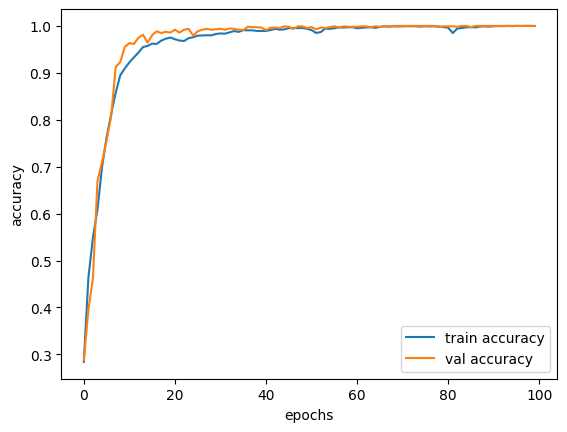

In [63]:
#Plot the result
epochs=list(range(100))
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
plt.plot(epochs,acc,label="train accuracy")
plt.plot(epochs,val_acc,label="val accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

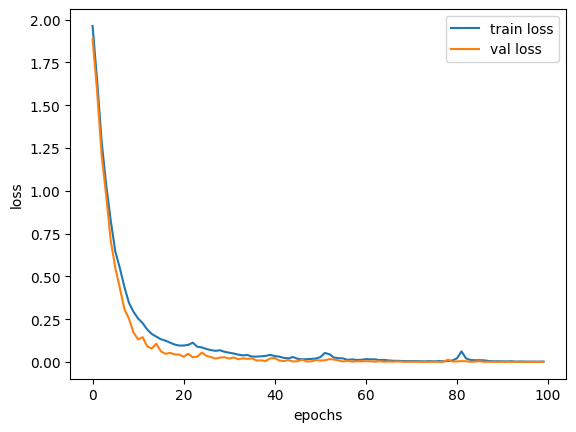

In [64]:
#Loss
loss=history.history["loss"]
val_loss=history.history["val_loss"]

plt.plot(epochs,loss,label="train loss")
plt.plot(epochs,val_loss,label="val loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
